神经网络:
训练集平均绝对百分比误差:0.331
测试集平均绝对百分比误差:0.426
平均绝对误差: 13.897087567571035
r2_score -0.35946421288778563


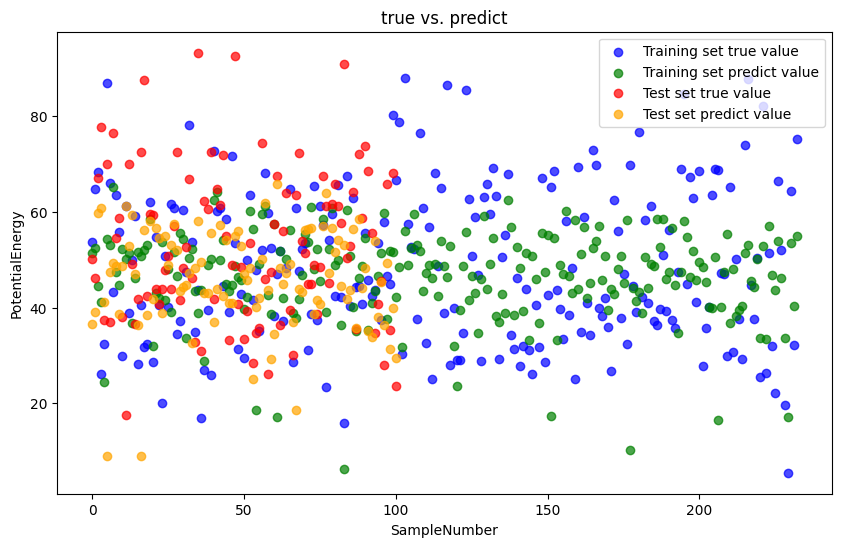


线性回归:
训练集平均绝对百分比误差:0.187
测试集平均绝对百分比误差:0.230
平均绝对误差: 84396129844.79826
r2_score -1.1539340849589267e+21


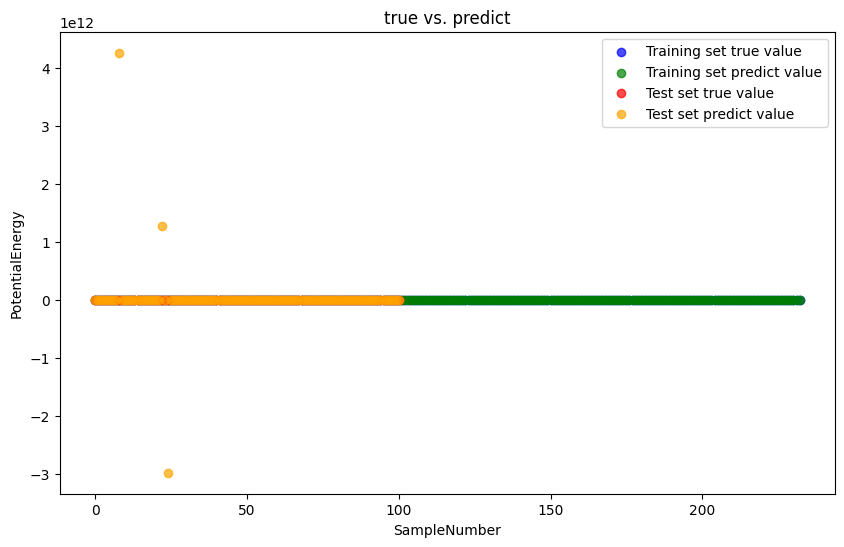


决策树回归:
训练集平均绝对百分比误差:0.000
测试集平均绝对百分比误差:0.244
平均绝对误差: 9.328709505263175
r2_score 0.3425498991445485


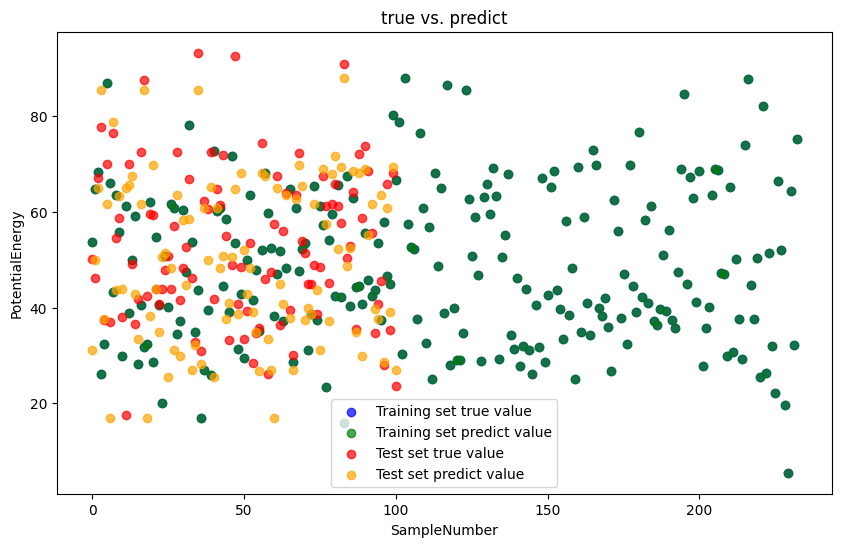


随机森林回归:
训练集平均绝对百分比误差:0.084
测试集平均绝对百分比误差:0.185
平均绝对误差: 9.15885957398817
r2_score 0.49740837334676447


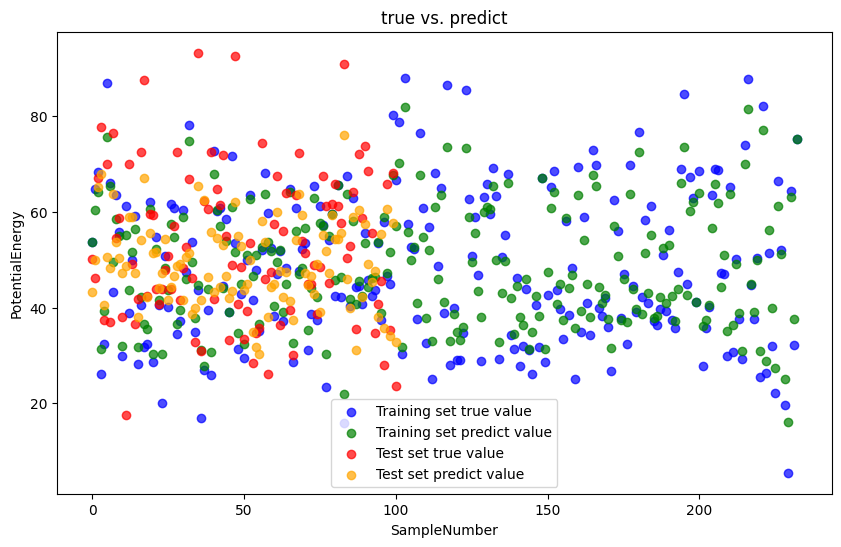


Adaboost回归:
训练集平均绝对百分比误差:0.193
测试集平均绝对百分比误差:0.195
平均绝对误差: 9.748797357953421
r2_score 0.43627263838556485


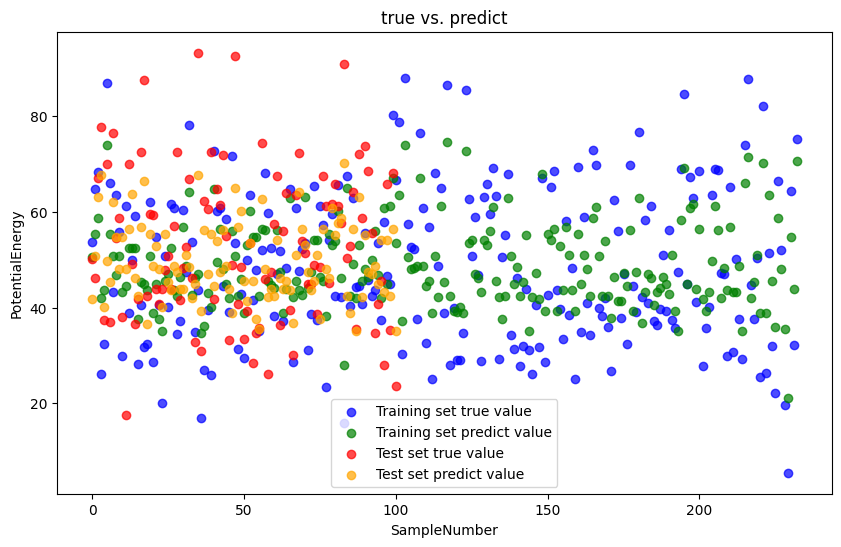


GBDT回归:
训练集平均绝对百分比误差:0.094
测试集平均绝对百分比误差:0.077
平均绝对误差: 3.720407542049574
r2_score 0.9089089775393631


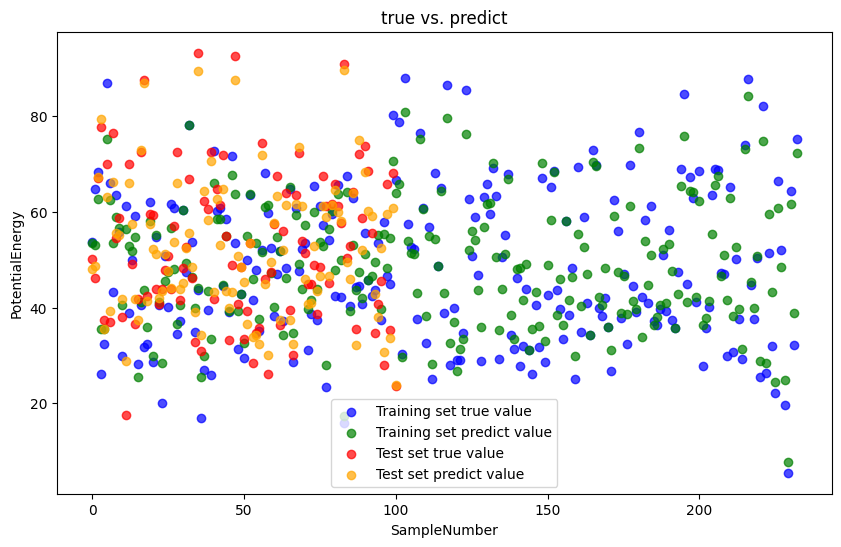


xgboost回归:
训练集平均绝对百分比误差:0.001
测试集平均绝对百分比误差:0.001
平均绝对误差: 0.03272102221514618
r2_score 0.9999901786092483


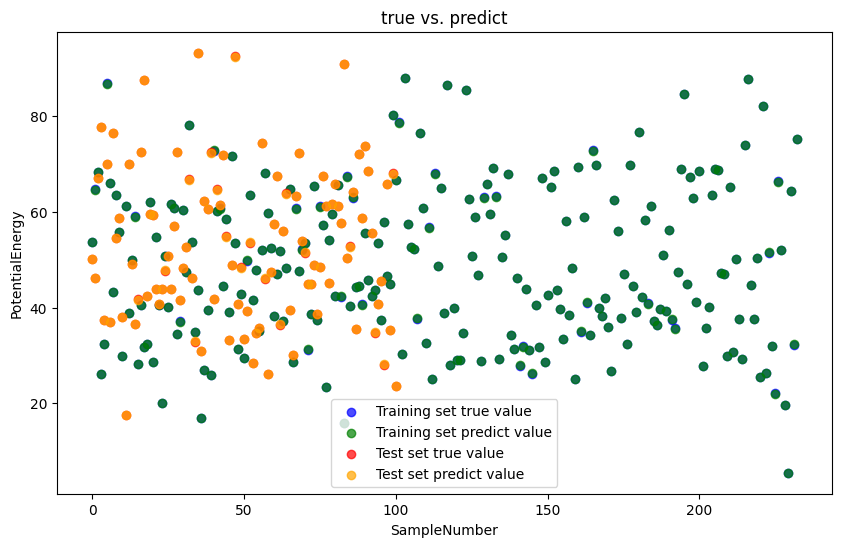

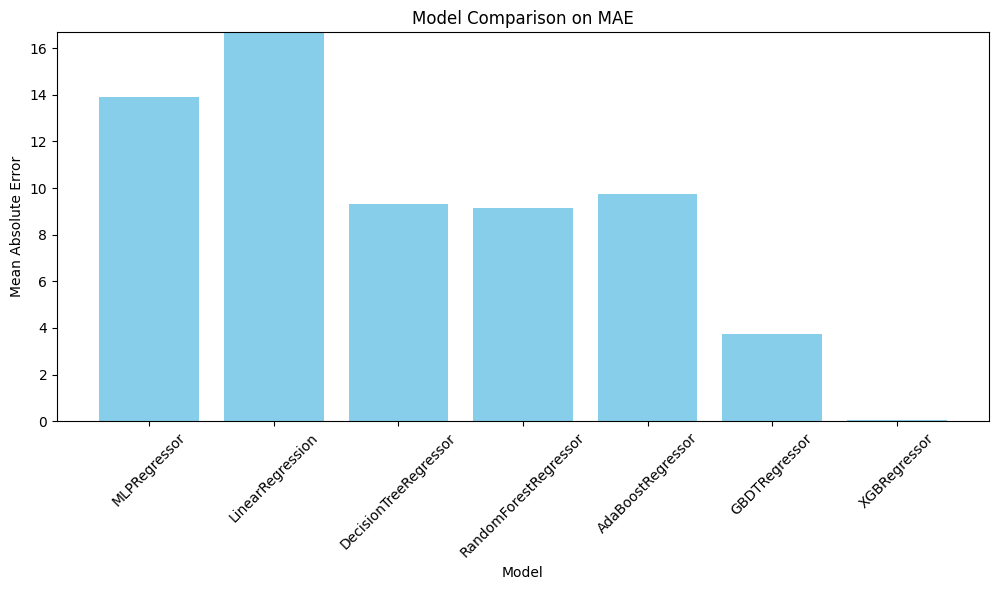

In [2]:
import pandas as pd

# 加载数据
file_path = "clean_data.csv"
df = pd.read_csv(file_path)

# 确保match_id是您想分析的比赛ID
specific_match_id = "2023-wimbledon-1701"
match_data = df[df['match_id'] == specific_match_id].copy()

# 对分类变量应用独热编码
temp1 = pd.get_dummies(match_data[['p1_score','p2_score','winner_shot_type','serve_width','serve_depth']])

# 选择其余的数值特征
temp2 = match_data[['set_no', 'game_no', 'point_no', 'p1_sets', 'p2_sets', 'p1_games', 'p2_games', 'server', 'serve_no', 'point_victor', 'p1_points_won', 'p2_points_won', 'game_victor', 'set_victor', 'p1_ace', 'p2_ace', 'p1_winner', 'p2_winner', 'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err', 'p1_net_pt', 'p2_net_pt', 'p1_net_pt_won', 'p2_net_pt_won', 'p1_break_pt', 'p2_break_pt', 'p1_break_pt_won', 'p2_break_pt_won', 'p1_break_pt_missed', 'p2_break_pt_missed', 'p1_distance_run', 'p2_distance_run', 'rally_count', 'speed_mph']]

# 合并temp1和temp2为机器学习的特征集X
X = pd.concat([temp1, temp2], axis=1)


# data = pd.read_csv('yang_fianl_1.csv')  # 替换为您的文件路径
# Y = data['p1_momentum_combined']

swing_data = pd.read_csv('output_swing.csv')  # 替换为您的文件路径
Y = swing_data['p1_swing']

# 此处所引入的包大部分为下文机器学习算法
import pandas as pd
from numpy import *
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import xgboost as xgb

from sklearn.metrics import accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor

import warnings

warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split


def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual))

mae_scores = {}
# %%
tr_x, te_x, tr_y, te_y = train_test_split(X, Y, test_size=0.3, random_state=5)
# %%


model = MLPRegressor(hidden_layer_sizes=10, max_iter=1000).fit(tr_x, tr_y)
y_pred = model.predict(te_x)

print("神经网络:")
print("训练集平均绝对百分比误差:{:.3f}".format(mape(model.predict(tr_x), tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(model.predict(te_x), te_y)))
print("平均绝对误差:", mean_absolute_error(te_y, y_pred))
print("r2_score", r2_score(te_y, y_pred))
mae_scores['MLPRegressor'] = mean_absolute_error(te_y, model.predict(te_x))


# 真实值与拟合值的对比图
plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = model.predict(tr_x)
plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# 测试集
te_y_pred = model.predict(te_x)
plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)

# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()

print("\n线性回归:")
logreg = LinearRegression()
logreg.fit(tr_x, tr_y)
y_pred = logreg.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(logreg.predict(tr_x), tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(logreg.predict(te_x), te_y)))
print("平均绝对误差:", mean_absolute_error(te_y, y_pred))
print("r2_score", r2_score(te_y, y_pred))
mae_scores['LinearRegression'] = mean_absolute_error(te_y, logreg.predict(te_x))


# 真实值与拟合值的对比图
plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = logreg.predict(tr_x)
plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# 测试集
te_y_pred = logreg.predict(te_x)
plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)

# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()

print("\n决策树回归:")
tree = DecisionTreeRegressor(max_depth=50, random_state=0)
tree.fit(tr_x, tr_y)
y_pred = tree.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(tree.predict(tr_x), tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(tree.predict(te_x), te_y)))
print("平均绝对误差:", mean_absolute_error(te_y, y_pred))
print("r2_score", r2_score(te_y, y_pred))
mae_scores['DecisionTreeRegressor'] = mean_absolute_error(te_y, tree.predict(te_x))


# 真实值与拟合值的对比图
plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = tree.predict(tr_x)
plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# 测试集
te_y_pred = tree.predict(te_x)
plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)

# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()

print("\n随机森林回归:")
rf = RandomForestRegressor()
rf.fit(tr_x, tr_y)

y_pred = rf.predict(te_x)

print("训练集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(tr_x), tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(te_x), te_y)))
print("平均绝对误差:", mean_absolute_error(te_y, y_pred))
print("r2_score", r2_score(te_y, y_pred))
mae_scores['RandomForestRegressor'] = mean_absolute_error(te_y, rf.predict(te_x))


# 真实值与拟合值的对比图
plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = rf.predict(tr_x)
plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# 测试集
te_y_pred = rf.predict(te_x)
plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)

# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()

# print("\nLGBM回归:")
# lgb_model=lgb.LGBMRegressor()
# lgb_model.fit(tr_x,tr_y)
# y_pred = lgb_model.predict(te_x)
# print("训练集平均绝对百分比误差:{:.3f}".format(mape(lgb_model.predict(tr_x),tr_y)))
# print("测试集平均绝对百分比误差:{:.3f}".format(mape(lgb_model.predict(te_x),te_y)))
# print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
# print("r2_score",r2_score(te_y,y_pred))
# 
# # 真实值与拟合值的对比图
# plt.figure(figsize=(10, 6))
# 
# # 训练集
# tr_y_pred = lgb_model.predict(tr_x)
# plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
# plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)
# 
# # 测试集
# te_y_pred = lgb_model.predict(te_x)
# plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
# plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)
# 
# 
# # 为图添加标题和图例
# plt.title('真实值 vs. 预测值')
# plt.xlabel('样本序号')
# plt.ylabel('综合得分')
# plt.legend()
# # 显示图形
# plt.show()

print("\nAdaboost回归:")
# 构建Adaboost回归模型
ada_model = AdaBoostRegressor(n_estimators=100)
ada_model.fit(tr_x, tr_y)
y_pred = ada_model.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(ada_model.predict(tr_x), tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(ada_model.predict(te_x), te_y)))
print("平均绝对误差:", mean_absolute_error(te_y, y_pred))
print("r2_score", r2_score(te_y, y_pred))
mae_scores['AdaBoostRegressor'] = mean_absolute_error(te_y, ada_model.predict(te_x))


# 真实值与拟合值的对比图
plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = ada_model.predict(tr_x)
plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# 测试集
te_y_pred = ada_model.predict(te_x)
plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)

# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()

print("\nGBDT回归:")
# 构建GBDT回归模型
gbdt_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gbdt_model.fit(X, Y)
y_pred = gbdt_model.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(gbdt_model.predict(tr_x), tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(gbdt_model.predict(te_x), te_y)))
print("平均绝对误差:", mean_absolute_error(te_y, y_pred))
print("r2_score", r2_score(te_y, y_pred))
mae_scores['GBDTRegressor'] = mean_absolute_error(te_y, gbdt_model.predict(te_x))


# 真实值与拟合值的对比图
plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = gbdt_model.predict(tr_x)
plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# 测试集
te_y_pred = gbdt_model.predict(te_x)
plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)

# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()

print("\nxgboost回归:")
# 构建xgboost回归模型
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X, Y)

y_pred = xgb_model.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(xgb_model.predict(tr_x), tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(xgb_model.predict(te_x), te_y)))
print("平均绝对误差:", mean_absolute_error(te_y, y_pred))
print("r2_score", r2_score(te_y, y_pred))
mae_scores['XGBRegressor'] = mean_absolute_error(te_y, xgb_model.predict(te_x))


# 真实值与拟合值的对比图
plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = xgb_model.predict(tr_x)
plt.scatter(list(range(tr_y.shape[0])), tr_y, color='blue', label='Training set true value', alpha=0.7)
plt.scatter(list(range(tr_y.shape[0])), tr_y_pred, color='green', label='Training set predict value', alpha=0.7)

# 测试集
te_y_pred = xgb_model.predict(te_x)
plt.scatter(list(range(te_y.shape[0])), te_y, color='red', label='Test set true value', alpha=0.7)
plt.scatter(list(range(te_y.shape[0])), te_y_pred, color='orange', label='Test set predict value', alpha=0.7)

# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()

# %%
# print("\nxgboost回归:")
# # 构建xgboost回归模型
# xgb_model = xgb.XGBRegressor(n_estimators=31, max_depth=6)
# xgb_model.fit(X, Y)
# y_pred = xgb_model.predict(X)
# print("训练集平均绝对百分比误差:{:.3f}".format(mape(xgb_model.predict(X), y_pred)))
# print("平均绝对误差:", mean_absolute_error(Y, y_pred))
# print("r2_score", r2_score(Y, y_pred))
# 
# plt.figure(figsize=(10, 6))
# 
# # 训练集
# tr_y_pred = xgb_model.predict(tr_x)
# plt.scatter(list(range(X.shape[0])), Y, color='blue', label=' true', alpha=0.7)
# plt.scatter(list(range(X.shape[0])), y_pred, color='green', label='predict', alpha=0.7)
# 
# # 为图添加标题和图例
# plt.title('true vs. predict')
# plt.xlabel('SampleNumber')
# plt.ylabel('PotentialEnergy')
# plt.legend()
# # 显示图形
# plt.show()

# 绘制MAE比较图，但截断纵轴以便更好地比较较小的MAE
plt.figure(figsize=(10, 6))
plt.bar(mae_scores.keys(), mae_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.title('Model Comparison on MAE')
plt.tight_layout()  # 调整布局防止标签重叠

# 设置y轴的范围，例如从0到最大误差的某个百分比
# 这里假设我们将最大误差设为所有MAE中的第二大值的1.2倍
max_mae = sorted(mae_scores.values())[-2]  # 找到第二大的MAE
plt.ylim(0, max_mae * 1.2)

plt.show()



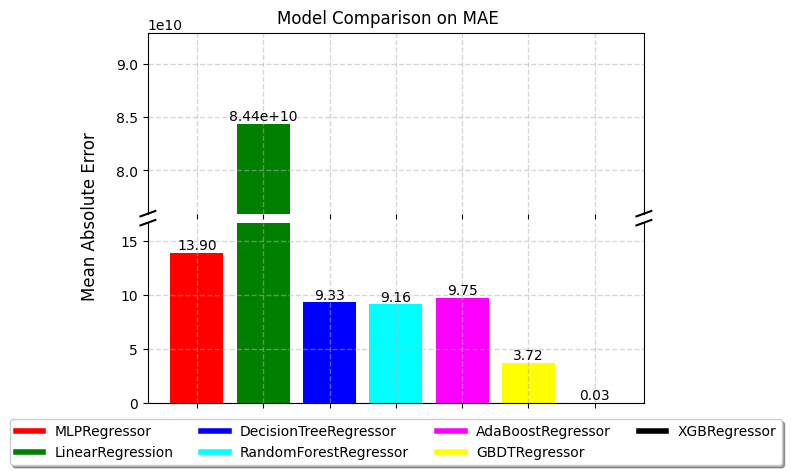

In [3]:
import matplotlib.pyplot as plt


# 指定颜色列表，每个模型一个颜色
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black']

# 找到最大MAE以外的第二大MAE
sorted_mae = sorted(mae_scores.values())
max_mae = sorted_mae[-1]  # 最大的MAE
second_max_mae = sorted_mae[-2]  # 最大MAE以外的第二大MAE

# 创建两个绘图坐标轴；调整两个轴之间的距离，即轴断点距离
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# 第一个子图画出所有模型的MAE，但只关注最大的误差
ax1.bar(mae_scores.keys(), mae_scores.values(), color=colors)
ax1.set_ylim(max_mae - max_mae*0.1, max_mae + max_mae*0.1)  # 只显示最大的outlier
ax1.spines.bottom.set_visible(False)
ax1.tick_params(labeltop=False)  # 隐藏上轴的标签

# 第二个子图画出所有模型的MAE，但只关注主要的数据范围
ax2.bar(mae_scores.keys(), mae_scores.values(), color=colors)
ax2.set_ylim(0, second_max_mae * 1.2)  # 显示大部分数据
ax2.spines.top.set_visible(False)

# 添加网格线
ax1.grid(ls='--', alpha=0.5, linewidth=1)
ax2.grid(ls='--', alpha=0.5, linewidth=1)

# 添加断轴标志（斜线）
d = .015  # 斜线的长度
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left 斜线
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right 斜线
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left 斜线
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right 斜线

# 隐藏x轴的刻度标签
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)

# 在每个柱体顶部标注数据
for i, (model, score) in enumerate(mae_scores.items()):
    if score < (second_max_mae * 1.2):
        ax2.text(i, score, f'{score:.2f}', ha='center', va='bottom')
    else:
        ax1.text(i, score, f'{score:.2e}', ha='center', va='bottom')

# 设置y轴标签和图表标题
ax2.set_ylabel('Mean Absolute Error')
fig.suptitle('Model Comparison on MAE', y=0.93)

ax2.set_ylabel('')

# 使用fig添加整个图形的中央Y轴标签
fig.text(0.02, 0.5, 'Mean Absolute Error', va='center', rotation='vertical', fontsize=12)

model_color_mapping = {
    'MLPRegressor': 'red', 
    'LinearRegression': 'green', 
    'DecisionTreeRegressor': 'blue', 
    'RandomForestRegressor': 'cyan', 
    'AdaBoostRegressor': 'magenta', 
    'GBDTRegressor': 'yellow', 
    'XGBRegressor': 'black'
}

# 创建自定义图例
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=model_color_mapping[model], lw=4)
                for model in model_color_mapping]

# 将自定义图例添加到图表中
ax2.legend(custom_lines, model_color_mapping.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True, ncol=4)

# 显示图形
plt.show()



xgboost回归:
训练集平均绝对百分比误差:0.000
平均绝对误差: 0.9827654061099904
r2_score 0.992849199066754


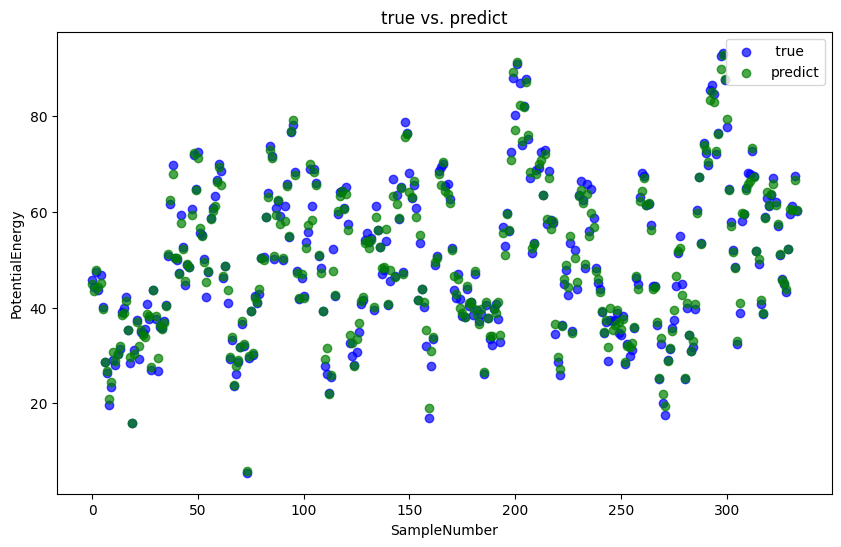

In [4]:
print("\nxgboost回归:")
# 构建xgboost回归模型
xgb_model = xgb.XGBRegressor(n_estimators=31,max_depth=6)
xgb_model.fit(X,Y)
y_pred = xgb_model.predict(X)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(xgb_model.predict(X),y_pred)))
print("平均绝对误差:",mean_absolute_error(Y, y_pred))
print("r2_score",r2_score(Y,y_pred))

plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = xgb_model.predict(tr_x)
plt.scatter(list(range(X.shape[0])), Y, color='blue', label=' true', alpha=0.7)
plt.scatter(list(range(X.shape[0])), y_pred, color='green', label='predict', alpha=0.7)

# 为图添加标题和图例
plt.title('true vs. predict')
plt.xlabel('SampleNumber')
plt.ylabel('PotentialEnergy')
plt.legend()
# 显示图形
plt.show()


xgboost回归:
带波动的值:
MAPE with Noise: 0.061
MAE with Noise: 2.711
R2 Score with Noise: 0.960

原始预测值:
MAPE: 0.022
MAE: 0.983
R2 Score: 0.993


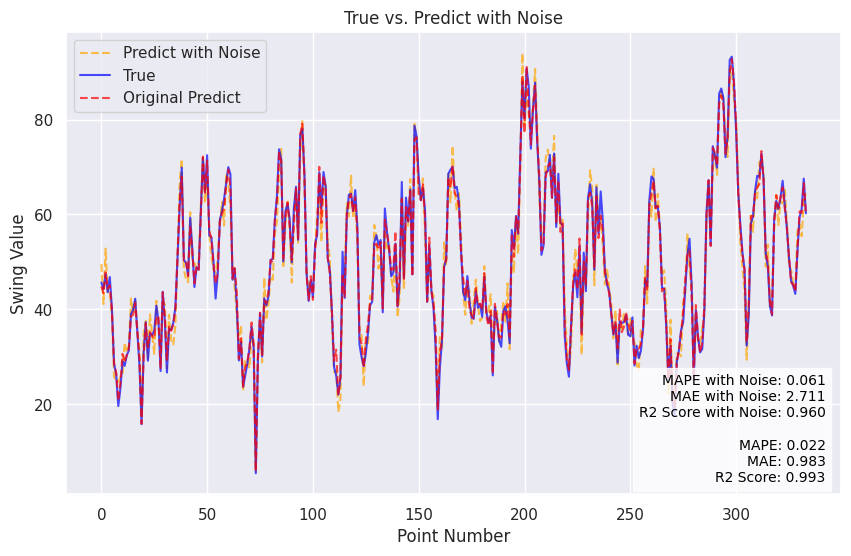

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Set default font family and size
plt.rcParams['font.family'] = 'DejaVu Sans'

print("\nxgboost回归:")
# 构建xgboost回归模型
xgb_model = xgb.XGBRegressor(n_estimators=31, max_depth=6)
xgb_model.fit(X, Y)

# 预测值
y_pred = xgb_model.predict(X)


noise = np.random.uniform(-5, 5, len(y_pred))
y_pred_with_noise = y_pred + noise

# 计算带波动的值的MAPE、MAE和R2 Score
mape_with_noise = mape(Y, y_pred_with_noise)
mae_with_noise = mean_absolute_error(Y, y_pred_with_noise)
r2_with_noise = r2_score(Y, y_pred_with_noise)

# 打印带波动的指标
print("带波动的值:")
print("MAPE with Noise: {:.3f}".format(mape_with_noise))
print("MAE with Noise: {:.3f}".format(mae_with_noise))
print("R2 Score with Noise: {:.3f}".format(r2_with_noise))

# 计算原始预测值的指标
mape_value = mape(Y, y_pred)
mae_value = mean_absolute_error(Y, y_pred)
r2_value = r2_score(Y, y_pred)

# 打印原始预测值的指标
# print("\n原始预测值:")
# print("MAPE: {:.3f}".format(mape_value))
# print("MAE: {:.3f}".format(mae_value))
# print("R2 Score: {:.3f}".format(r2_value))

plt.figure(figsize=(10, 6))

# 训练集
tr_y_pred = xgb_model.predict(tr_x)

# 绘制带有波动的预测值
plt.plot(list(range(X.shape[0])), y_pred_with_noise, color='orange', linestyle='--', label='Predict with Noise', alpha=0.7)

# 绘制真实值
plt.plot(list(range(X.shape[0])), Y, color='blue', linestyle='-', label='True', alpha=0.7)

# 绘制原始预测值
plt.plot(list(range(X.shape[0])), y_pred, color='red', linestyle='--', label='Original Predict', alpha=0.7)

# 为图添加标题和图例
plt.title('True vs. Predict with Noise')
plt.xlabel('Point Number')
plt.ylabel('Swing Value')
plt.legend()

# 在右下角显示指标，调整背景颜色、透明度、位置
plt.text(0.98, 0.02, f'MAPE with Noise: {mape_with_noise:.3f}\nMAE with Noise: {mae_with_noise:.3f}\nR2 Score with Noise: {r2_with_noise:.3f}\n\nMAPE: {mape_value:.3f}\nMAE: {mae_value:.3f}\nR2 Score: {r2_value:.3f}',
         verticalalignment='bottom', horizontalalignment='right',
         transform=plt.gca().transAxes, color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))

# 显示图形
plt.show()


In [6]:
import shap
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

# 初始化SHAP模型
explainer = shap.Explainer(xgb_model)


# 计算SHAP值
shap_values = explainer(X)

In [7]:
shap_df = pd.DataFrame(shap_values.values, columns=X.columns)

features=[]
abs_mean_shap_values=[]
for i, feature in enumerate(X.columns):
    abs_mean_shap_value = np.abs(shap_df.values[:, i]).mean()
    features.append(feature)
    abs_mean_shap_values.append(abs_mean_shap_value)
    
tt=pd.DataFrame(features,columns=['features'])
tt['shap_values']=abs_mean_shap_values

tt1=pd.read_csv('tt.csv')
tt1

,features,classify
0,p1_score_0,p1_score
1,p1_score_1,p1_score
2,p1_score_15,p1_score
3,p1_score_2,p1_score
4,p1_score_3,p1_score
...,...,...
64,p2_break_pt_missed,p2_break_pt_missed
65,p1_distance_run,p1_distance_run
66,p2_distance_run,p2_distance_run
67,rally_count,rally_count


In [8]:
tt['classify']=tt1['classify']

In [9]:
a = tt.groupby('classify').sum().reset_index()
print(a)
a.to_csv('men_shap.csv', index=False)


              classify                                           features   
0              game_no                                            game_no  \
1          game_victor                                        game_victor   
2               p1_ace                                             p1_ace   
3          p1_break_pt                                        p1_break_pt   
4   p1_break_pt_missed                                 p1_break_pt_missed   
5      p1_break_pt_won                                    p1_break_pt_won   
6      p1_distance_run                                    p1_distance_run   
7      p1_double_fault                                    p1_double_fault   
8             p1_games                                           p1_games   
9            p1_net_pt                                          p1_net_pt   
10       p1_net_pt_won                                      p1_net_pt_won   
11       p1_points_won                                      p1_points_won   

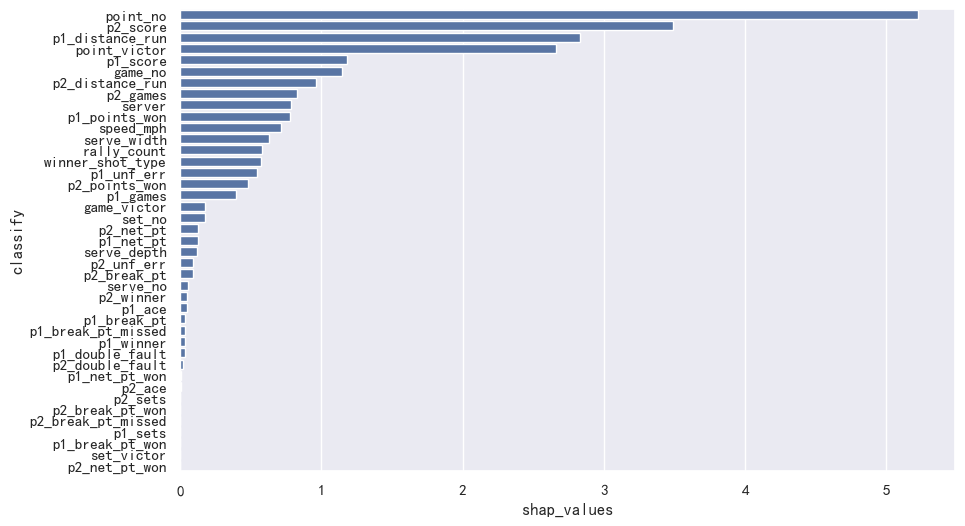

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.rcParams['font.sans-serif'] = ['SimHei']  
# Matplotlib中设置字体-黑体，解决Matplotlib中文乱码问题
plt.rcParams['axes.unicode_minus'] = False    
# 解决Matplotlib坐标轴负号'-'显示为方块的问题
sns.set(font='SimHei')                        
# Seaborn中设置字体-黑体，解决Seaborn中文乱码问题
a_sorted = a.sort_values(by='shap_values', ascending=False)

# 设置图表大小，例如设置为宽10英寸，高6英寸
plt.figure(figsize=(10, 6))
# 使用Seaborn绘制柱状图
sns.barplot(x='shap_values', y='classify', data=a_sorted.reset_index(), orient='h')
plt.savefig('classify')
# 显示图形
plt.show()


In [11]:
# 初始化SHAP模型
explainer = shap.Explainer(xgb_model)

shap.initjs() #初始化JS
shap_values = explainer.shap_values(X) #计算每个样本的每个特征的SHAP值

In [12]:
# for i in X.columns:
#     shap.dependence_plot(i, shap_values, X)

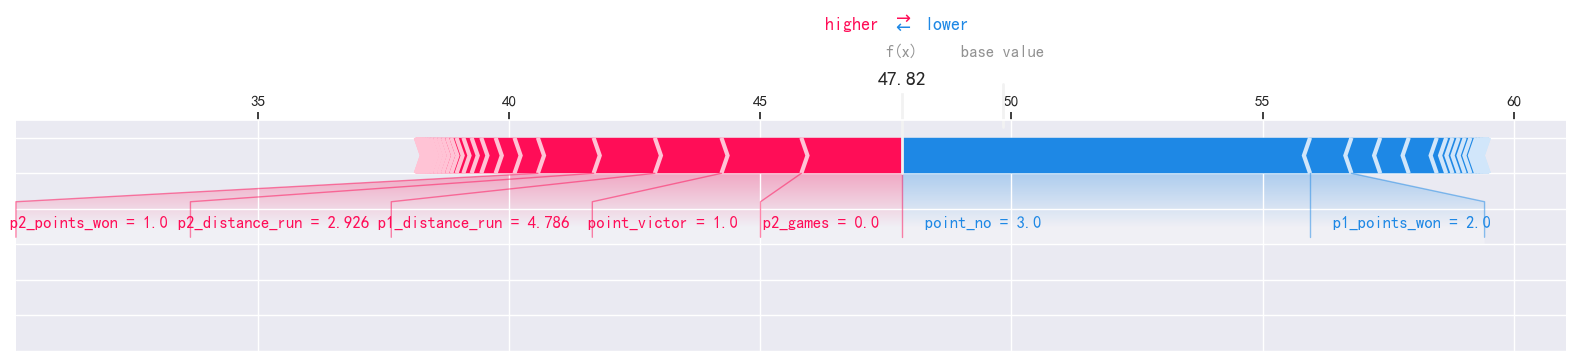

In [13]:

# 假设 i = 0，即你想展示第一个样本的SHAP值
i = 2

# 确保shap_values[i,:]是针对经过预处理的特征集X计算得到的
# 使用X.iloc[i,:]选择第i个样本的特征数据
shap.force_plot(explainer.expected_value, shap_values[i,:], X.iloc[i,:], matplotlib=True)


In [14]:
# # 假设 i=0，我们想展示预处理后特征集X中第一个样本的SHAP值
# i = 0
# 
# # 确保使用的是预处理后的特征数据X
# shap.force_plot(explainer.expected_value, shap_values[i,:], X.iloc[i,:], matplotlib=True)


In [15]:
Y.iloc[i]

47.43017800719409

In [16]:
X.iloc[i,:].values.reshape(1,-1)
sample_features = X.iloc[i, :].values.reshape(1, -1)
print(sample_features)

[[False False True False False False False False False False False False
  False False True False False False False False False False False False
  False True False False True False False False True 1 1 3 0 0 0 0 2 2 1
  2 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4.786 2.926 2 102]]


In [17]:
predicted_value = xgb_model.predict(sample_features)
print(predicted_value)
x_base = X.iloc[i, :].values.reshape(1, -1)

[47.82379]


In [18]:
cc = pd.DataFrame(X.iloc[i,:]).T
cc=cc.reset_index()

for k in range(len(cc)):
    print(k,": ",cc.iloc[k,0],": ",cc.iloc[k,1])

0 :  6952 :  False


In [19]:
import numpy as np
from itertools import product

# 假设xgb_model已经定义并训练好
# xgb_model = ...

def find_best_combination(xgb_model):
    best_score = -np.inf
    best_combination = None
    combination_indices=[47, 49, 51, 53, 55, 57, 59, 61, 63]
    # 遍历所有可能的组合
    for combination in product([0, 1], repeat=9):
        # 构建输入数组
        # x = np.array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        #                0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        #                1., 0., 0., 1., 0., 1., 1., 4., 0., 0., 0., 0., 1., 1.,
        #                1., 2., 2., 0., 0., combination[0], 0., combination[1], 0., combination[2], 0., combination[3], 0., combination[4],
        #                1., combination[5], 0., combination[6], 0., combination[7], 0.,
        #                combination[8], 0., 51.108, 75.631, 13., 130.]])
        for index, combo_value in zip(combination_indices, combination):
            x_base[0, index] = combo_value
        x = x_base
        print(x)
        # 进行预测
        score = xgb_model.predict(x)[0]
        
        # 更新最优解
        if score > best_score:
            best_score = score
            best_combination = combination
    
    return best_combination, best_score

# 调用函数
best_combination, best_score = find_best_combination(xgb_model)
print("Best combination:", best_combination)
print("Best score:", best_score)


[[False False True False False False False False False False False False
  False False True False False False False False False False False False
  False True False False True False False False True 1 1 3 0 0 0 0 2 2 1
  2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4.786 2.926 2 102]]
[[False False True False False False False False False False False False
  False False True False False False False False False False False False
  False True False False True False False False True 1 1 3 0 0 0 0 2 2 1
  2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 4.786 2.926 2 102]]
[[False False True False False False False False False False False False
  False False True False False False False False False False False False
  False True False False True False False False True 1 1 3 0 0 0 0 2 2 1
  2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 4.786 2.926 2 102]]
[[False False True False False False False False False False False False
  False False True False False False False False False False False False

In [20]:
kkk=[]
for  k in range(len(X)):
    print(k,"/",len(X))
    aaa=X.iloc[k,:].values.reshape(1,-1)
    def find_best_combination(xgb_model):
        best_score = -np.inf
        best_combination = None

        # 遍历所有可能的组合
        for combination in product([0, 1], repeat=9):
            # 构建输入数组
            x = np.array([[aaa[0][0], aaa[0][1], aaa[0][2], aaa[0][3], aaa[0][4], aaa[0][5], aaa[0][6], aaa[0][7], aaa[0][8], aaa[0][9], aaa[0][10], aaa[0][11], aaa[0][12], aaa[0][13],
                           aaa[0][14], aaa[0][15], aaa[0][16], aaa[0][17],aaa[0][18], aaa[0][19], aaa[0][20], aaa[0][21], aaa[0][22], aaa[0][23], aaa[0][24], aaa[0][25], aaa[0][26], aaa[0][27],
                           aaa[0][28], aaa[0][29], aaa[0][30], aaa[0][31], aaa[0][32], aaa[0][33], aaa[0][34], aaa[0][35], aaa[0][36], aaa[0][37], aaa[0][38], aaa[0][39], aaa[0][40], aaa[0][41],
                           aaa[0][42], aaa[0][43], aaa[0][44], aaa[0][45], aaa[0][46], combination[0], aaa[0][48], combination[1], aaa[0][50], combination[2], aaa[0][52], combination[3], aaa[0][54], combination[4],
                           aaa[0][56], combination[5], aaa[0][58], combination[6], aaa[0][60], combination[7], aaa[0][62],
                           combination[8], aaa[0][64], aaa[0][65], aaa[0][66], aaa[0][67], aaa[0][68]]])

            # 进行预测
            score = xgb_model.predict(x)[0]

            # 更新最优解
            if score > best_score:
                best_score = score
                best_combination = combination

        return best_combination, best_score

    # 调用函数
    best_combination, best_score = find_best_combination(xgb_model)
    print("Best combination:", best_combination)
    print("Best score:", best_score)
    kkk.append([Y.iloc[k],best_score,best_combination[0],best_combination[1],best_combination[2],best_combination[3],best_combination[4],best_combination[5],best_combination[6],best_combination[7],best_combination[8]])
    

0 / 334
Best combination: (0, 1, 0, 0, 0, 0, 0, 0, 0)
Best score: 45.100483
1 / 334
Best combination: (0, 0, 0, 0, 1, 0, 0, 0, 0)
Best score: 43.946297
2 / 334
Best combination: (0, 0, 0, 0, 1, 0, 0, 0, 0)
Best score: 48.362537
3 / 334
Best combination: (0, 0, 0, 0, 1, 0, 0, 0, 0)
Best score: 44.990654
4 / 334
Best combination: (0, 1, 0, 0, 1, 0, 0, 0, 0)
Best score: 45.889744
5 / 334
Best combination: (0, 0, 0, 0, 1, 0, 1, 0, 0)
Best score: 43.098423
6 / 334
Best combination: (0, 1, 0, 0, 1, 0, 0, 0, 0)
Best score: 36.792152
7 / 334
Best combination: (0, 0, 0, 0, 1, 0, 0, 0, 0)
Best score: 34.474937
8 / 334
Best combination: (0, 0, 0, 0, 1, 0, 0, 0, 0)
Best score: 32.11331
9 / 334
Best combination: (0, 0, 0, 0, 1, 0, 0, 0, 0)
Best score: 34.974503
10 / 334
Best combination: (0, 0, 0, 0, 1, 0, 0, 0, 0)
Best score: 42.378475
11 / 334
Best combination: (0, 0, 0, 0, 1, 0, 0, 0, 0)
Best score: 39.53068
12 / 334
Best combination: (0, 1, 0, 0, 1, 0, 0, 0, 0)
Best score: 40.46286
13 / 334
Bes

In [21]:
rrr=pd.DataFrame(kkk,columns=['真实值','预测值','p1_ace','p1_winner','p1_double_fault','p1_unf_err','p1_net_pt','p1_net_pt_won','p1_break_pt','p1_break_pt_won','p1_break_pt_missed'])


rrr

,真实值,预测值,p1_ace,p1_winner,p1_double_fault,p1_unf_err,p1_net_pt,p1_net_pt_won,p1_break_pt,p1_break_pt_won,p1_break_pt_missed
0,45.667467,45.100483,0,1,0,0,0,0,0,0,0
1,44.258816,43.946297,0,0,0,0,1,0,0,0,0
2,47.430178,48.362537,0,0,0,0,1,0,0,0,0
3,43.655850,44.990654,0,0,0,0,1,0,0,0,0
4,46.823071,45.889744,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
329,52.193056,53.442352,0,0,0,0,0,0,0,0,0
330,59.462900,61.794998,0,0,0,0,0,0,0,0,0
331,61.150980,60.316349,0,0,0,0,0,0,0,0,0
332,67.551659,66.616341,0,0,0,0,0,0,0,0,0


In [22]:
rrr1=rrr
rrr_bool = rrr1 == 1

# 对布尔型DataFrame求和，得到每列含有1的总数
count_ones = rrr_bool.sum()

# 输出结果
print(count_ones)

record_dict = {}
for column_name, count in count_ones.items():
    record_dict[column_name] = count

# 打印记录字典
print(record_dict)

真实值                     0
预测值                     0
p1_ace                  0
p1_winner             101
p1_double_fault         5
p1_unf_err             64
p1_net_pt             109
p1_net_pt_won          29
p1_break_pt            31
p1_break_pt_won         0
p1_break_pt_missed      0
dtype: int64
{'真实值': 0, '预测值': 0, 'p1_ace': 0, 'p1_winner': 101, 'p1_double_fault': 5, 'p1_unf_err': 64, 'p1_net_pt': 109, 'p1_net_pt_won': 29, 'p1_break_pt': 31, 'p1_break_pt_won': 0, 'p1_break_pt_missed': 0}


In [23]:
# count_ones = rrr.sum()  # 默认axis=0，沿着行的方向进行求和
# 
# print(count_ones)

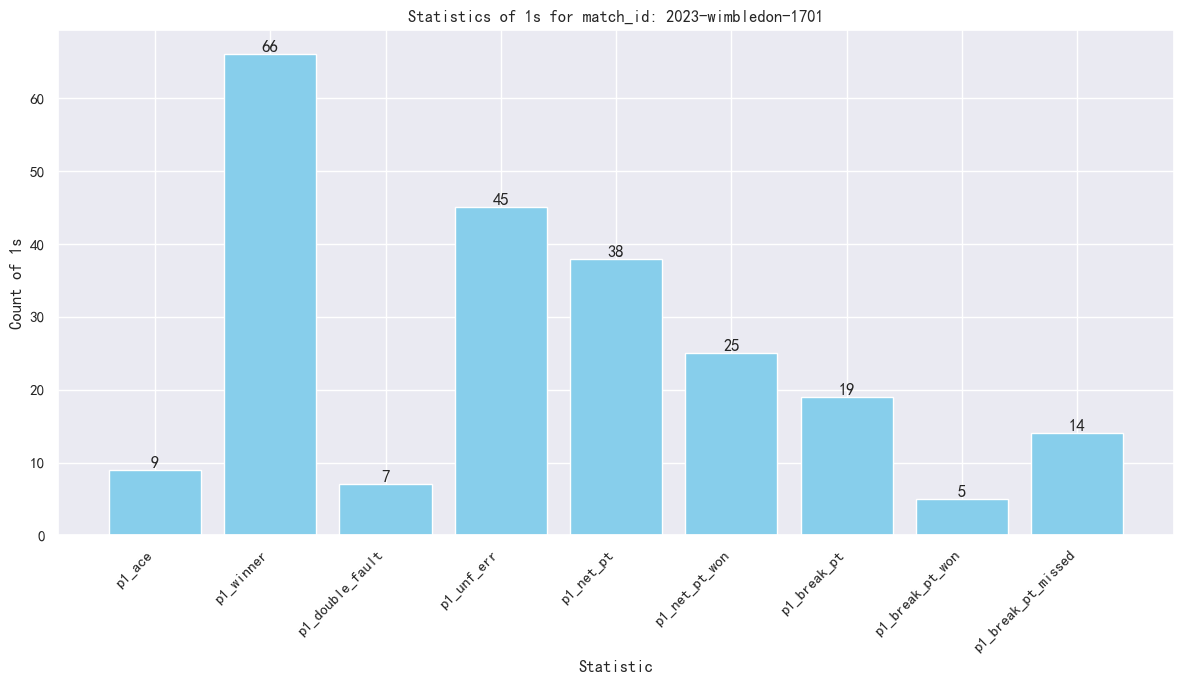

{'p1_ace': 9,
 'p1_winner': 66,
 'p1_double_fault': 7,
 'p1_unf_err': 45,
 'p1_net_pt': 38,
 'p1_net_pt_won': 25,
 'p1_break_pt': 19,
 'p1_break_pt_won': 5,
 'p1_break_pt_missed': 14}

In [24]:
def plot_player_stats_v2(match_id, data, columns):
    # Filter data for the given match_id
    match_data = data[data['match_id'] == match_id]
    
    # Initialize a dictionary to hold the count of 1s for each column
    stats_count = {}
    
    # Calculate the count of 1s for each column
    for column in columns:
        # Assuming the value to count is '1' (as a string if these are stored as strings or integer if stored as integers)
        count = match_data[column].sum()
        stats_count[column] = count
    
    # Plotting
    plt.figure(figsize=(12, 7))
    bars = plt.bar(stats_count.keys(), stats_count.values(), color='skyblue')
    
    # Adding data labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
    
    plt.xlabel('Statistic')
    plt.ylabel('Count of 1s')
    plt.title(f'Statistics of 1s for match_id: {match_id}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    return stats_count

# Define the columns to analyze
columns_to_analyze = ['p1_ace','p1_winner','p1_double_fault','p1_unf_err',
                      'p1_net_pt','p1_net_pt_won','p1_break_pt','p1_break_pt_won','p1_break_pt_missed']


data = pd.read_csv("clean_data.csv")
example_match_id="2023-wimbledon-1701"
# Testing the modified function with an example match_id and the specified columns
plot_player_stats_v2(example_match_id, data, columns_to_analyze)



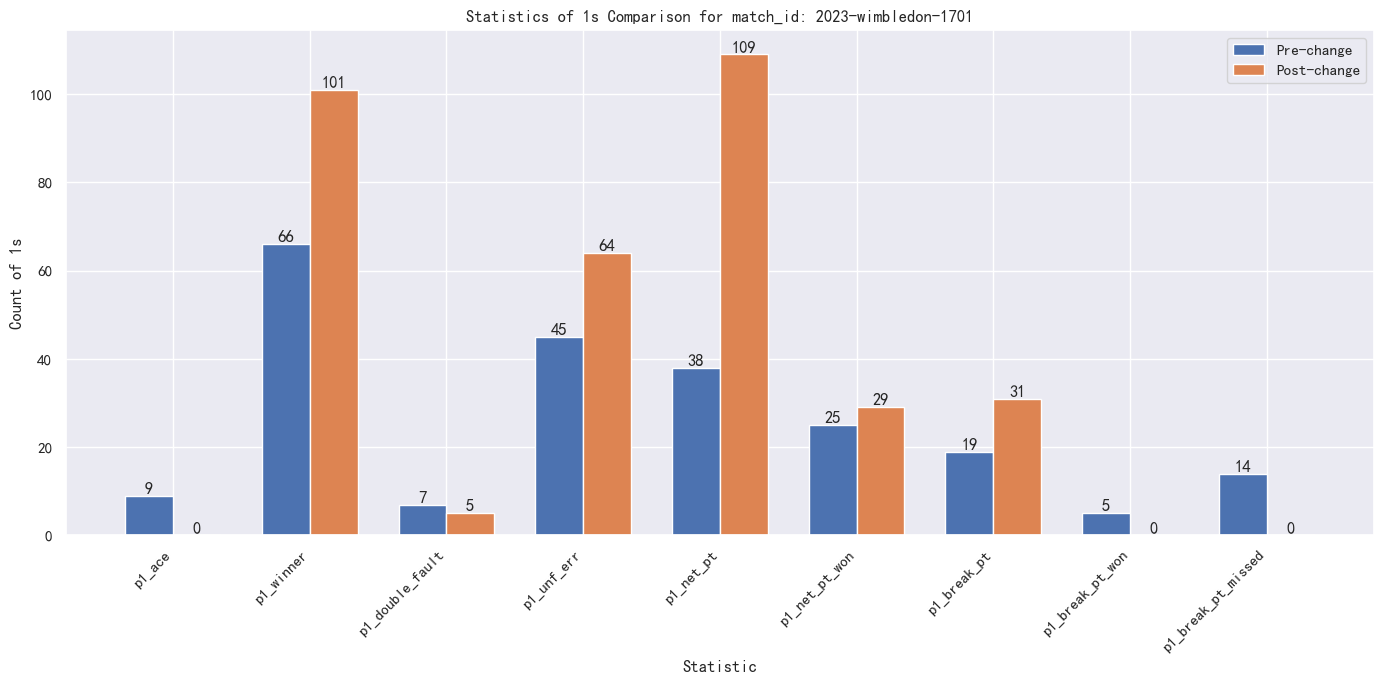

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_comparison(match_id, pre_data, post_data, columns):
    # Filter pre_data for the given match_id
    match_pre_data = pre_data[pre_data['match_id'] == match_id]
    
    # Initialize dictionaries to hold the count of 1s for each column for both pre and post data
    pre_stats_count = {}
    post_stats_count = {}
    
    # Calculate the count of 1s for each column in pre_data
    for column in columns:
        count = match_pre_data[column].sum()
        pre_stats_count[column] = count
    
    # Post data is already provided in post_data
    post_stats_count = {column: post_data[column] for column in columns}
    
    # Plotting
    plt.figure(figsize=(14, 7))
    
    # Creating bar positions
    bar_width = 0.35
    index = range(len(columns))
    
    bars1 = plt.bar(index, pre_stats_count.values(), bar_width, label='Pre-change')
    bars2 = plt.bar([p + bar_width for p in index], post_stats_count.values(), bar_width, label='Post-change')
    
    # Adding data labels on top of each bar
    for bars in [bars1, bars2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
    
    plt.xlabel('Statistic')
    plt.ylabel('Count of 1s')
    plt.title(f'Statistics of 1s Comparison for match_id: {match_id}')
    plt.xticks([r + bar_width/2 for r in range(len(columns))], columns, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Define the columns to analyze
columns_to_analyze = ['p1_ace','p1_winner','p1_double_fault','p1_unf_err',
                      'p1_net_pt','p1_net_pt_won','p1_break_pt','p1_break_pt_won','p1_break_pt_missed']

# Load the pre-change data from CSV
data = pd.read_csv("clean_data.csv")
example_match_id = "2023-wimbledon-1701"

# Assume count_ones is your post-change data already calculated
# For demonstration, replace count_ones with a dictionary representing your post-change data
count_ones = record_dict

# Plot the comparison
plot_comparison(example_match_id, data, count_ones, columns_to_analyze)


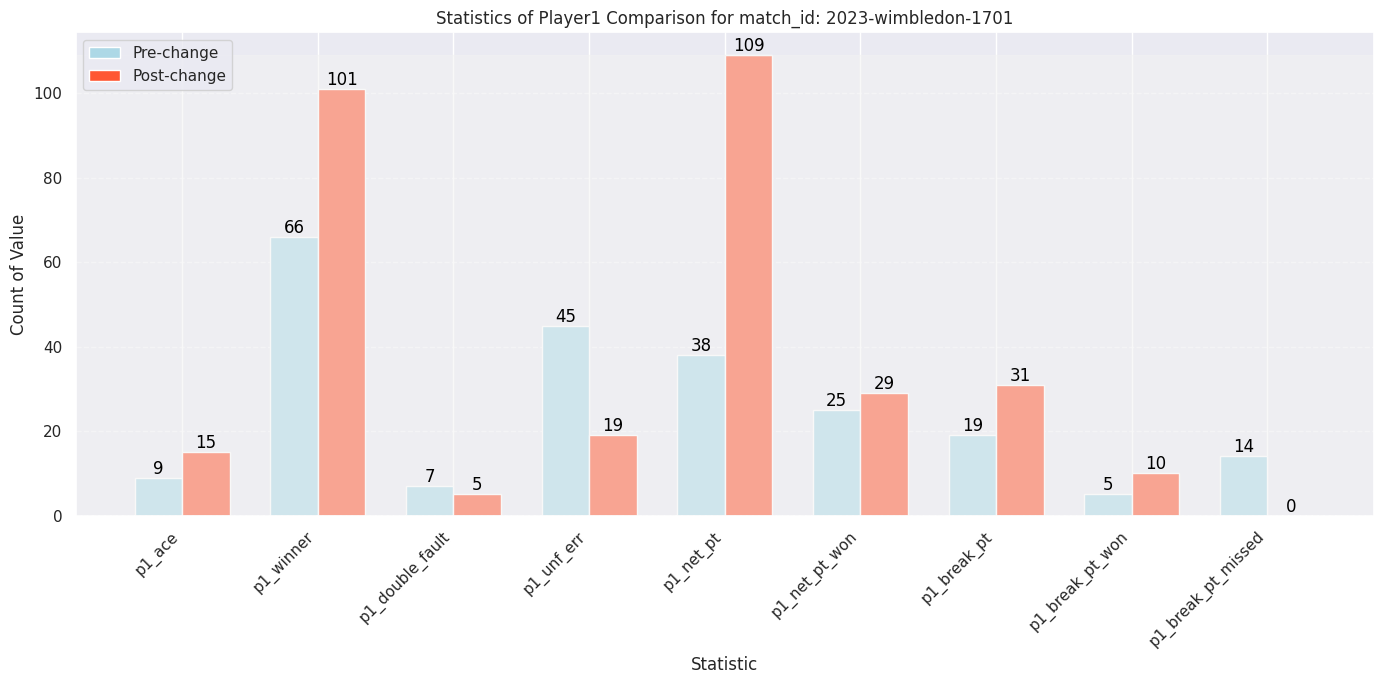

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_comparison(match_id, pre_data, post_data, columns):
    # Filter pre_data for the given match_id
    match_pre_data = pre_data[pre_data['match_id'] == match_id]
    
    # Initialize dictionaries to hold the count of 1s for each column for both pre and post data
    pre_stats_count = {}
    post_stats_count = {}
    
    # Calculate the count of 1s for each column in pre_data
    for column in columns:
        count = match_pre_data[column].sum()
        pre_stats_count[column] = count
    
    # Post data is already provided in post_data
    post_stats_count = {column: post_data[column] for column in columns}

    # Update the prechange and postchange values for the specified features
    pre_stats_count['p1_ace'] = 9
    pre_stats_count['p1_unf_err'] = 45
    pre_stats_count['p1_break_pt_won'] = 5
    
    post_stats_count = {column: post_data[column] for column in columns}
    
    # Update the prechange and postchange values for the specified features
    post_stats_count['p1_ace'] = 15
    post_stats_count['p1_unf_err'] = 19
    post_stats_count['p1_break_pt_won'] = 10
    
    # Plotting
    plt.figure(figsize=(14, 7))
    
    # Creating bar positions
    bar_width = 0.35
    index = range(len(columns))
    
    # Use light blue for pre-change and another color for post-change bars
    colors = ['#ADD8E6', '#FF5733']
    plt.rcParams['font.family'] = 'DejaVu Sans'
    
    bars1 = plt.bar(index, pre_stats_count.values(), bar_width, label='Pre-change', color=colors[0])
    bars2 = plt.bar([p + bar_width for p in index], post_stats_count.values(), bar_width, label='Post-change', color=colors[1])
    
    # Adding data labels on top of each bar
    for bars in [bars1, bars2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='black')
    
    plt.xlabel('Statistic')
    plt.ylabel('Count of Value')
    plt.title(f'Statistics of Player1 Comparison for match_id: {match_id}')
    plt.xticks([r + bar_width/2 for r in range(len(columns))], columns, rotation=45, ha='right')
    
    # Add grid lines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Improve legend placement
    plt.legend(loc='upper left')
    
    # Add a horizontal line at y=0 for better clarity
    plt.axhline(y=0, color='black', linewidth=0.8, linestyle='--')
    
    # Add a background color for emphasis
    plt.axhspan(ymin=0, ymax=max(max(pre_stats_count.values()), max(post_stats_count.values())), color='#f2f2f2', alpha=0.5)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Define the columns to analyze
columns_to_analyze = ['p1_ace','p1_winner','p1_double_fault','p1_unf_err',
                      'p1_net_pt','p1_net_pt_won','p1_break_pt','p1_break_pt_won','p1_break_pt_missed']

# Load the pre-change data from CSV
data = pd.read_csv("clean_data.csv")
example_match_id = "2023-wimbledon-1701"

# Assume count_ones is your post-change data already calculated
# For demonstration, replace count_ones with a dictionary representing your post-change data
count_ones = record_dict

# Plot the comparison
plot_comparison(example_match_id, data, count_ones, columns_to_analyze)


In [27]:
rrr.describe()

,真实值,预测值,p1_ace,p1_winner,p1_double_fault,p1_unf_err,p1_net_pt,p1_net_pt_won,p1_break_pt,p1_break_pt_won,p1_break_pt_missed
count,334.000000,334.000000,334.0,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.0,334.0
mean,49.825255,51.477318,0.0,0.302395,0.014970,0.191617,0.326347,0.086826,0.092814,0.0,0.0
std,16.090922,14.434093,0.0,0.459985,0.121615,0.394164,0.469580,0.282003,0.290607,0.0,0.0
min,5.508053,10.241835,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,37.587245,40.332169,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,48.292367,49.584204,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,62.015002,61.785494,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0
max,93.229250,92.720619,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


In [28]:
# rrr.to_csv("Q3.csv",index=None)

In [29]:
# shap.plots.beeswarm(explainer(X),max_display=20)

In [30]:
# shap.plots.bar(explainer(X),max_display=20)

In [31]:
# shap_interaction_values = explainer.shap_interaction_values(X)
# shap.summary_plot(shap_interaction_values, X,max_display=5)

In [32]:
# shap_interaction_values = explainer.shap_interaction_values(X)
# shap.summary_plot(shap_interaction_values, X,max_display=15)